In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
color = sns.color_palette()

## Bringing in the Data

In [2]:
#bringing in test data
dfv = pd.read_csv('../Data/training_variants')
dft = pd.read_csv("../Data/training_text",sep="\|\|", engine='python', header=None, skiprows=1, names=["ID","Text"])

In [3]:
dfv.head()

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


In [4]:
dfv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3321 entries, 0 to 3320
Data columns (total 4 columns):
ID           3321 non-null int64
Gene         3321 non-null object
Variation    3321 non-null object
Class        3321 non-null int64
dtypes: int64(2), object(2)
memory usage: 103.9+ KB


In [5]:
# text and variant datasets match on ID
dft.head()

,ID,Text
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


In [6]:
df = pd.merge(dfv,dft,how = "inner", on = 'ID')

In [7]:
df.head()

,ID,Gene,Variation,Class,Text
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...


In [8]:
#wwow thats a long textfile
df.iloc[0,4]

"Cyclin-dependent kinases (CDKs) regulate a variety of fundamental cellular processes. CDK10 stands out as one of the last orphan CDKs for which no activating cyclin has been identified and no kinase activity revealed. Previous work has shown that CDK10 silencing increases ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2)-driven activation of the MAPK pathway, which confers tamoxifen resistance to breast cancer cells. The precise mechanisms by which CDK10 modulates ETS2 activity, and more generally the functions of CDK10, remain elusive. Here we demonstrate that CDK10 is a cyclin-dependent kinase by identifying cyclin M as an activating cyclin. Cyclin M, an orphan cyclin, is the product of FAM58A, whose mutations cause STAR syndrome, a human developmental anomaly whose features include toe syndactyly, telecanthus, and anogenital and renal malformations. We show that STAR syndrome-associated cyclin M mutants are unable to interact with CDK10. Cyclin M silencing phenocopies CDK1

In [9]:
# creating a small version to practice with modeling tools later
df_small = df.iloc[:10,:]
pd.to_pickle(df_small, '../Data/sample.pkl')

## Exploring Class

CLASS NUMBERS: array([1, 2, 3, 4, 5, 6, 7, 8, 9])




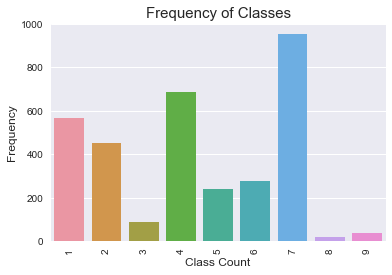

In [10]:
# Looks like we have a total of 9 unique classes

print('CLASS NUMBERS: %r' %(dfv.Class.unique()) + "\n\n")
sns.countplot(x="Class", data=dfv)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Class Count', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Classes", fontsize=15)
plt.show()

## Exploring Genes

In [11]:
#whats the distribution of genes in this place?

#there are just as many entries for BRCA1 as there are unique genes

print(len(df.Gene.unique()))
df.Gene.value_counts()

264


BRCA1     264
TP53      163
EGFR      141
PTEN      126
BRCA2     125
KIT        99
BRAF       93
ERBB2      69
ALK        69
PDGFRA     60
PIK3CA     56
CDKN2A     52
FGFR2      50
FLT3       49
TSC2       47
MTOR       45
KRAS       44
MAP2K1     43
VHL        41
RET        40
FGFR3      39
MLH1       35
MET        33
SMAD4      33
JAK2       33
NOTCH1     31
AKT1       28
ABL1       26
ROS1       26
PTPN11     26
         ... 
FLT1        1
WHSC1       1
AURKB       1
ERRFI1      1
FAM58A      1
SDHC        1
IL7R        1
SRSF2       1
AXIN1       1
CDK8        1
ATR         1
AXL         1
RAD51D      1
MYOD1       1
PAK1        1
LATS1       1
DUSP4       1
ASXL1       1
SHQ1        1
BCL2        1
FANCC       1
MEN1        1
SDHB        1
CEBPA       1
RRAS2       1
ARID1A      1
GNAQ        1
RNF43       1
ASXL2       1
KMT2B       1
Name: Gene, dtype: int64

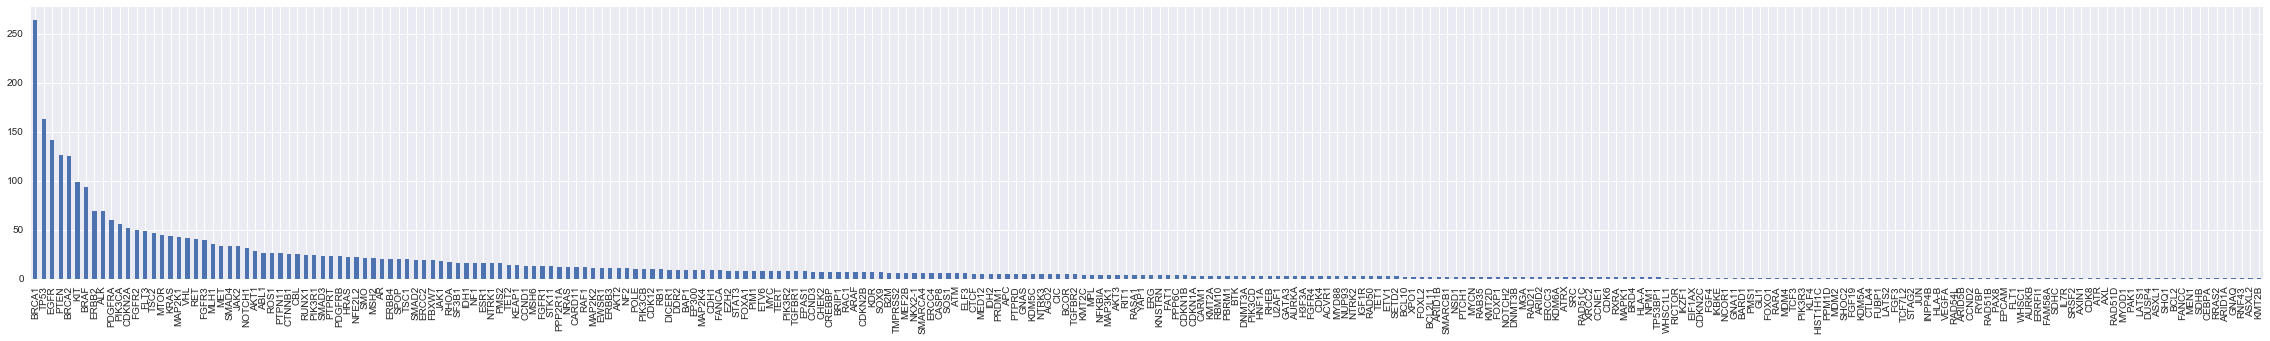

In [12]:
#most of the entries fall into a 
df.Gene.value_counts().plot(kind='bar', figsize = (40,5))

In [13]:
# prevalent genes may have different classes distribitions
df[df.Gene == "BRCA1"].Class.value_counts()

5    90
1    60
6    53
4    46
3    15
Name: Class, dtype: int64

In [14]:
df[df.Gene == "TP53"].Class.value_counts()

1    83
4    67
6     5
2     3
5     2
3     2
9     1
Name: Class, dtype: int64

In [15]:
# but thats not necessarily because they have the same variant
df[df.Gene == "TP53"].Variation.value_counts().head(10)

H233N                                    1
DNA binding domain missense mutations    1
C135S                                    1
T150I                                    1
L344P                                    1
H168N                                    1
G266E                                    1
R267Q                                    1
K120M                                    1
R337C                                    1
Name: Variation, dtype: int64

## Exploring Genetic Variations

In [16]:
# It looks like there are hardly any common amino acids SNPS which we can classify off of
# I wonder if these mutation categoris have different class distributions 
df.Variation.value_counts().head(10)

Truncating Mutations    93
Deletion                74
Amplification           71
Fusions                 34
Overexpression           6
G12V                     4
Q61R                     3
T58I                     3
E17K                     3
Q61L                     3
Name: Variation, dtype: int64

In [17]:
# well ain't that somethin'
df[df.Variation=='Truncating Mutations'].Class.value_counts()

1    89
6     2
4     1
2     1
Name: Class, dtype: int64

In [18]:
df[df.Variation=='Deletion'].Class.value_counts()

1    57
4    16
6     1
Name: Class, dtype: int64

In [19]:
df[df.Variation=='Amplification'].Class.value_counts()

7    40
2    21
6    10
Name: Class, dtype: int64

In [20]:
# this is going to be valuable information for our model
df[df.Variation=='Fusions'].Class.value_counts()

2    31
1     2
8     1
Name: Class, dtype: int64

## Exploring Text Features

In [21]:
#app 6,000 words in one entry
len(df.iloc[0,4].split())

6089

In [22]:
mystring = df.iloc[0,4].split()+df.iloc[1,4].split()+df.iloc[2,4].split()
#17000 words for 3 entries
len((mystring))

17601

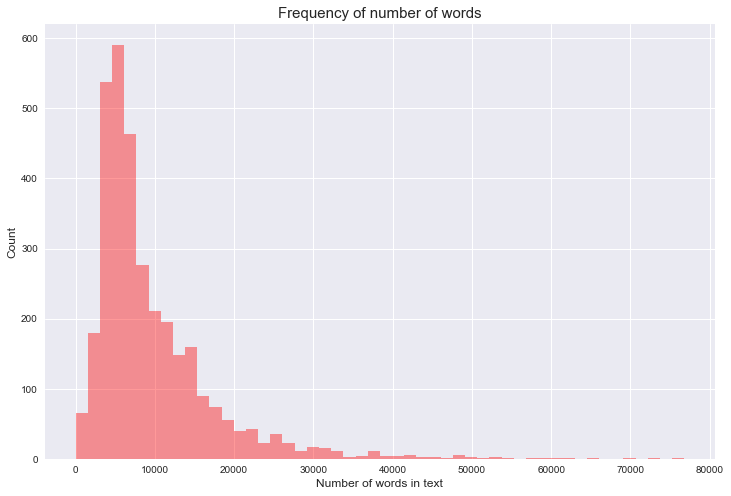

In [23]:
df['Text_num_words'] = df["Text"].apply(lambda x: len(str(x).split()) )

plt.figure(figsize=(12, 8))
sns.distplot(df.Text_num_words.values, bins=50, kde=False, color='red')
plt.xlabel('Number of words in text', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title("Frequency of number of words", fontsize=15)
plt.show()

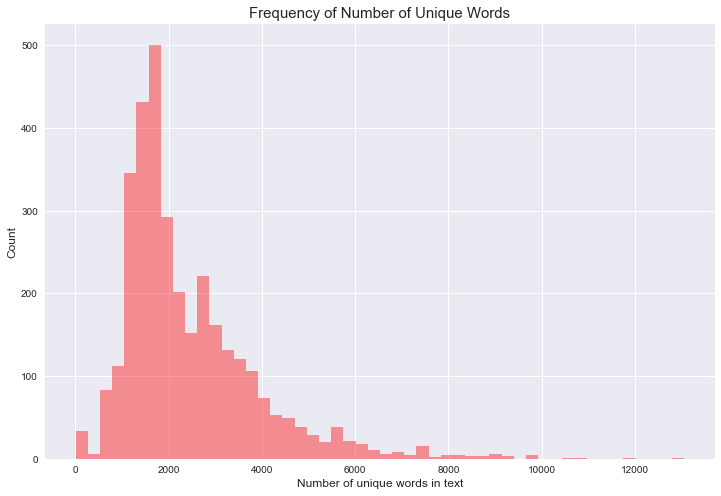

In [24]:
#number of words and number of unique words both have similar distributions
df['Text_num_unique_words'] = df["Text"].apply(lambda x: len(set(str(x).split()) ))

plt.figure(figsize=(12, 8))
sns.distplot(df.Text_num_unique_words.values, bins=50, kde=False, color='red')
plt.xlabel('Number of unique words in text', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title("Frequency of Number of Unique Words", fontsize=15)
plt.show()

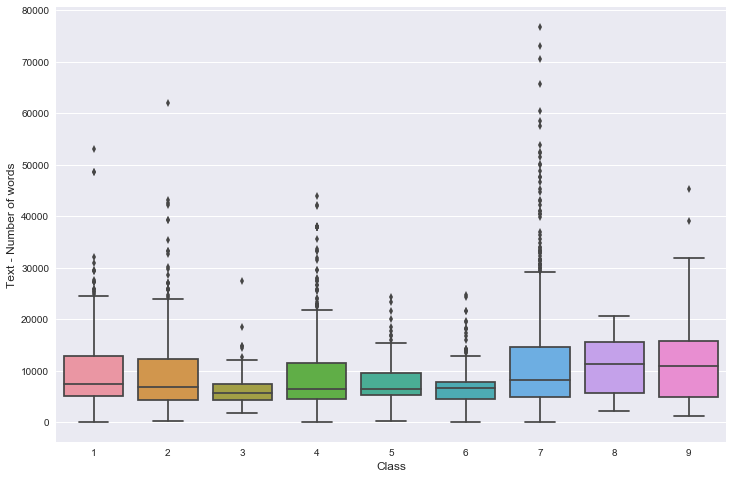

In [66]:
#However the length of a given text may be able to help us determine category as well
plt.figure(figsize=(12,8))
sns.boxplot(x='Class', y='Text_num_words', data=df)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Text - Number of words', fontsize=12)
plt.show()

## Exploring Relationships between Categories

In [25]:
#Some gene-class overlaps do share the same text, but not all...
#In fact, quite a bit of the dataset can be grouped by the same gene and class

# However, different papers will discuss different variants
# There's simply more research to reference for common oncogenes like BRCA1, 

print(df.info())
print('----------------------')
print(df.groupby(['Gene',"Class", 'Text'], as_index = False).first().info())
print('----------------------')
print(df.groupby(['Gene',"Class"], as_index = False).first().info())
print('----------------------')
print(df.groupby(['Text'], as_index = False).first().info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3321 entries, 0 to 3320
Data columns (total 7 columns):
ID                       3321 non-null int64
Gene                     3321 non-null object
Variation                3321 non-null object
Class                    3321 non-null int64
Text                     3321 non-null object
Text_num_words           3321 non-null int64
Text_num_unique_words    3321 non-null int64
dtypes: int64(4), object(3)
memory usage: 207.6+ KB
None
----------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2148 entries, 0 to 2147
Data columns (total 7 columns):
Gene                     2148 non-null object
Class                    2148 non-null int64
Text                     2148 non-null object
ID                       2148 non-null int64
Variation                2148 non-null object
Text_num_words           2148 non-null int64
Text_num_unique_words    2148 non-null int64
dtypes: int64(4), object(3)
memory usage: 134.2+ KB
None
---------------

In [26]:
df_cat = df

## Exploratory NLP Modeling

In [122]:
import nltk
from textblob import TextBlob
from scipy import sparse
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

In [ ]:
y = df[['ID','Class']]
X = df[['ID','Text']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [28]:
text = list(X_train.Text)
type(text)

list

In [29]:
vectorizer = TfidfVectorizer(stop_words = 'english', ngram_range=(1,3))
doc_vectors = vectorizer.fit_transform(text)
classes = np.array(y_train.Class)
test_vector = vectorizer.transform(X_test.Text)

In [32]:
#Multinomial Naive Bayes
model = MultinomialNB().fit(doc_vectors, classes)
predictions = model.predict(test_vector)

testing_NB = pd.merge(X_test, y_test, on='ID').dropna(how='all')
predict_NB = pd.concat([testing_NB, pd.Series(predictions)],axis = 1)
predict_NB.columns = ['ID', 'Text', 'Class', 'Predicted']
accuracy_NB = len(list(predict_NB[predict_NB.Class == predict_NB.Predicted].Class))/len(list(predict_NB.Class))

In [127]:
#Support Vector Classifier
model = LinearSVC().fit(doc_vectors, classes)
predictions = model.predict(test_vector)

testing_SVC = pd.merge(X_test, y_test, on='ID').dropna(how='all')
predict_SVC = pd.concat([testing_SVC, pd.Series(predictions)],axis = 1)
predict_SVC.columns = ['ID', 'Text', 'Class', 'Predicted']
accuracy_SVC = len(list(predict_SVC[predict_SVC.Class == predict_SVC.Predicted].Class))/len(list(predict_SVC.Class))

In [126]:
#Support Vector Classifier, return probability
model = SVC(kernel='linear',probability=True).fit(doc_vectors, classes)
predictions = model.predict_proba(test_vector)

testing_SVC1 = pd.merge(X_test, y_test, on='ID').dropna(how='all')
SVC1predictions = pd.DataFrame(predictions)
predict_SVC1 = pd.merge(testing_SVC1.reset_index(), SVC1predictions.reset_index(), on = 'index')
predict_SVC1.columns = ['index', 'ID', 'Text', 'Class', 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [129]:
SVC1predictions = pd.DataFrame(predictions)
predict_SVC1 = pd.merge(testing_SVC1.reset_index(), SVC1predictions.reset_index(), on = 'index')
predict_SVC1.columns = ['index', 'ID', 'Text', 'Class', 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [130]:
#RandomForest Classifier
model = RandomForestClassifier(n_estimators = 20).fit(doc_vectors, classes)
predictions = model.predict(test_vector)

testing_RF = pd.merge(X_test, y_test, on='ID').dropna(how='all')
predict_RF = pd.concat([testing_RF, pd.Series(predictions)],axis = 1)
predict_RF.columns = ['ID', 'Text', 'Class', 'Predicted']
accuracy_RF = len(list(predict_RF[predict_RF.Class == predict_RF.Predicted].Class))/len(list(predict_RF.Class))

In [131]:
feature_importances = pd.DataFrame(model.feature_importances_)

decisionpath = model.decision_path(test_vector)
decisions = pd.DataFrame(decisionpath[0].toarray())

In [132]:
#Lets check some out-of-the-box accuracies
print('Naive Bayes Accuracy: %r' %accuracy_NB)
print('Support Vector Accuracy: %r' %accuracy_SVC)
print('Random Forest Accuracy: %r' %accuracy_RF)

Naive Bayes Accuracy: 0.5126353790613718
Support Vector Accuracy: 0.6425992779783394
Random Forest Accuracy: 0.6040914560770156


## Next Steps
### Balancing the Model
- accuracy, recall, precision for all categories
- develop balanced dataset with equal proportions of all categories
- try RBF SVC if possible?
- which models are overfit, which are underfit
- which variables are misclassified most frequently
- is it possible to display a multiclass ROC

### Incorporating additional Features in to TFIDF sparse matrix
- Gene, Variation, Len of Text Entry from original data
- Protien features: https://www.kaggle.com/danofer/genetic-variants-to-protein-features
- add feature for physiochemical distance between amino acids?

### Dimenension Reduction on Vectorized Text Input
- figure out how to do it
- figure out how to understand the effects of different dimension reductions

In [133]:
# Cleaning up for later
pd.to_pickle(predict_NB, '../Data/NaiveBayesPredictions.pkl')
pd.to_pickle(predict_SVC, '../Data/LinearSVCPredictions.pkl')
pd.to_pickle(predict_NB, '../Data/LinearSVCProbabilities.pkl')
pd.to_pickle(predict_RF, '../Data/RandomForestProbabilities.pkl')

In [134]:
pd.to_pickle(decisions,'../Data/RandomForestDecisions.pkl')
pd.to_pickle(feature_importances,'../Data/RandomForestFeatures.pkl')